In [232]:
f = open("time.txt")
l=[]
for line in f:
    l.append([w for w in line.replace("\t", " ").replace("\n", "").split(" ") if w != ''])
f.close()
# l[:3]

In [233]:
ll = []
i=0
while i< len(l):
    v, p, e = l[i][0][:-4].split("_")
    ll.append([int(v), float(p), int(e), float(l[i+1][1][:-1]), float(l[i+2][1][:-1]), float(l[i+3][1][:-1]), int(l[i+4][1]), int(l[i+5][1])])
    i+=6
ll[:3]

[[0, 0.002, 0, 3e-06, 1e-06, 1e-06, 0, 1],
 [0, 0.005, 0, 3e-06, 1e-06, 1e-06, 0, 1],
 [0, 0.01, 0, 3e-06, 1e-06, 2e-06, 0, 1]]

In [234]:
import csv
f = open("time.csv", "w")
f.write("vertices,percentage,edges,tarjan,nuutila,pearce,components,correct\n")
w = csv.writer(f)
w.writerows(ll)
f.close()

In [235]:
import pandas as pd

In [254]:
t = pd.read_csv("time.csv")
t = t[["vertices","percentage","edges", "tarjan", "nuutila", "pearce"]].groupby(by=["vertices","percentage","edges"], as_index=False).mean()

In [255]:
t["v+e"]=t["vertices"]+t["edges"]

In [ ]:
#for n in ["tarjan", "nuutila", "pearce"]:
#    t[n] = t[n]/t["v+e"]

In [256]:
t = t.sort_values(by=["v+e"])

/usr/lib64/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


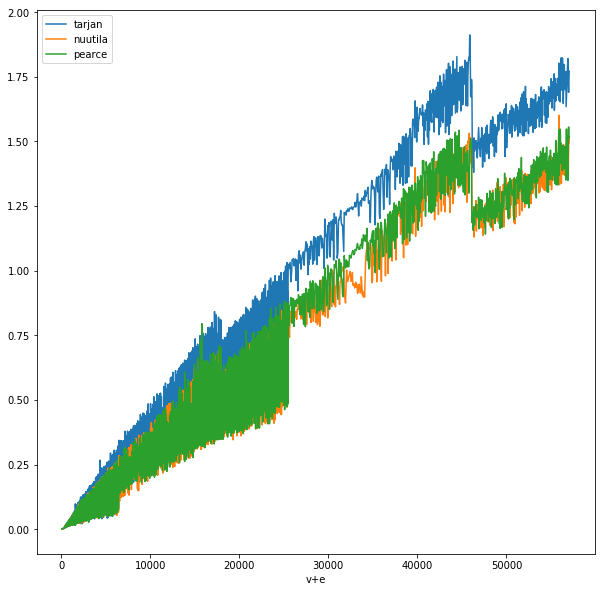

In [257]:
t.plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(10,10))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

## Matplotlib Sample Code using 2D arrays via meshgrid
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = 
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')
plt.show()